<a href="https://colab.research.google.com/github/Vish417/python-/blob/master/Stock%20market%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock market Prediction using LSTM-Deep Learning 

## Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback connections.

![alt text](https://drive.google.com/uc?export=view&id=1hIr0kRG33IFz3HxXCzOvUB6ATp9iO85R)

### Collection of Google data using tiingo API

### Pandas (all lowercase) is a popular Python-based data analysis toolkit.
### It presents a diverse range of utilities, ranging from parsing multiple file-formats to converting an entire data table into a NumPy matrix array. 

### The Pandas datareader is a sub package that allows one to create a dataframe from various internet datasources

In [1]:
import pandas_datareader as pdr
key="a28ba693f65c36f6a5fd04956664bf3a57260a81"
df = pdr.get_data_tiingo('GOOGL', api_key=key)
df.to_csv('GOOGL.csv')
import pandas as pd
df=pd.read_csv('GOOGL.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2015-08-03 00:00:00+00:00,664.72,666.670,657.6600,657.66,1567407,664.72,666.670,657.6600,657.66,1567407,0.0,1.0
1,GOOGL,2015-08-04 00:00:00+00:00,661.28,668.000,660.5100,664.34,1309410,661.28,668.000,660.5100,664.34,1309410,0.0,1.0
2,GOOGL,2015-08-05 00:00:00+00:00,673.29,679.910,665.5827,665.75,1812589,673.29,679.910,665.5827,665.75,1812589,0.0,1.0
3,GOOGL,2015-08-06 00:00:00+00:00,670.15,674.750,660.7300,673.99,2032984,670.15,674.750,660.7300,673.99,2032984,0.0,1.0
4,GOOGL,2015-08-07 00:00:00+00:00,664.39,668.795,658.8700,667.78,1377152,664.39,668.795,658.8700,667.78,1377152,0.0,1.0


# Data Preprocsessing For testing and training

### Removing All the Columns having only close value

In [2]:
df1=df.reset_index()['close']
df1

0        664.72
1        661.28
2        673.29
3        670.15
4        664.39
         ...   
1254    1529.43
1255    1503.65
1256    1523.51
1257    1538.37
1258    1487.95
Name: close, Length: 1259, dtype: float64

## MinMaxScaler. Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. ... This transformation is often used as an alternative to zero mean, unit variance scaling.
## Scaling is necessary because the values of closing prices is differing a lot 


In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.05486255]
 [0.05125055]
 [0.06386106]
 ...
 [0.95659296]
 [0.97219597]
 [0.91925492]]


### Splitting of data into train and test about 65% of data

In [4]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(818, 441)

### NumPy is a Python library that is the core library for scientific computing in Python. It contains a collection of tools and techniques that can be used to solve on a computer mathematical models of problems in Science and Engineering. One of these tools is a high-performance multidimensional array object that is a powerful data structure for efficient computation of arrays and matrices
### Converting Array of Values into Datatset Matrix i.e converting into numpy arrays and reshaping of variables

In [5]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

## Reshapping into 3-D Model For LSTM 
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html

In [6]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating a  Stacked LSTM Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [8]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 265ms/step - loss: 0.0424 - val_loss: 0.0447
Epoch 2/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 3/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0033 - val_loss: 0.0118
Epoch 4/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0017 - val_loss: 0.0074
Epoch 5/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0014 - val_loss: 0.0058
Epoch 6/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0013 - val_loss: 0.0058
Epoch 7/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 8/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0013 - val_loss: 0.0060
Epoch 9/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 10/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0013 - val_lo

# Prediction and Performance

mean squared Errpr(MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.

![](https://drive.google.com/uc?export=view&id=1LmWRV8dZEHAgt7Bwh7F3YDGwZxmU7eSM)

In [9]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
math.sqrt(mean_squared_error(ytest,test_predict))

1310.1996886077457

# Plotting of Graph

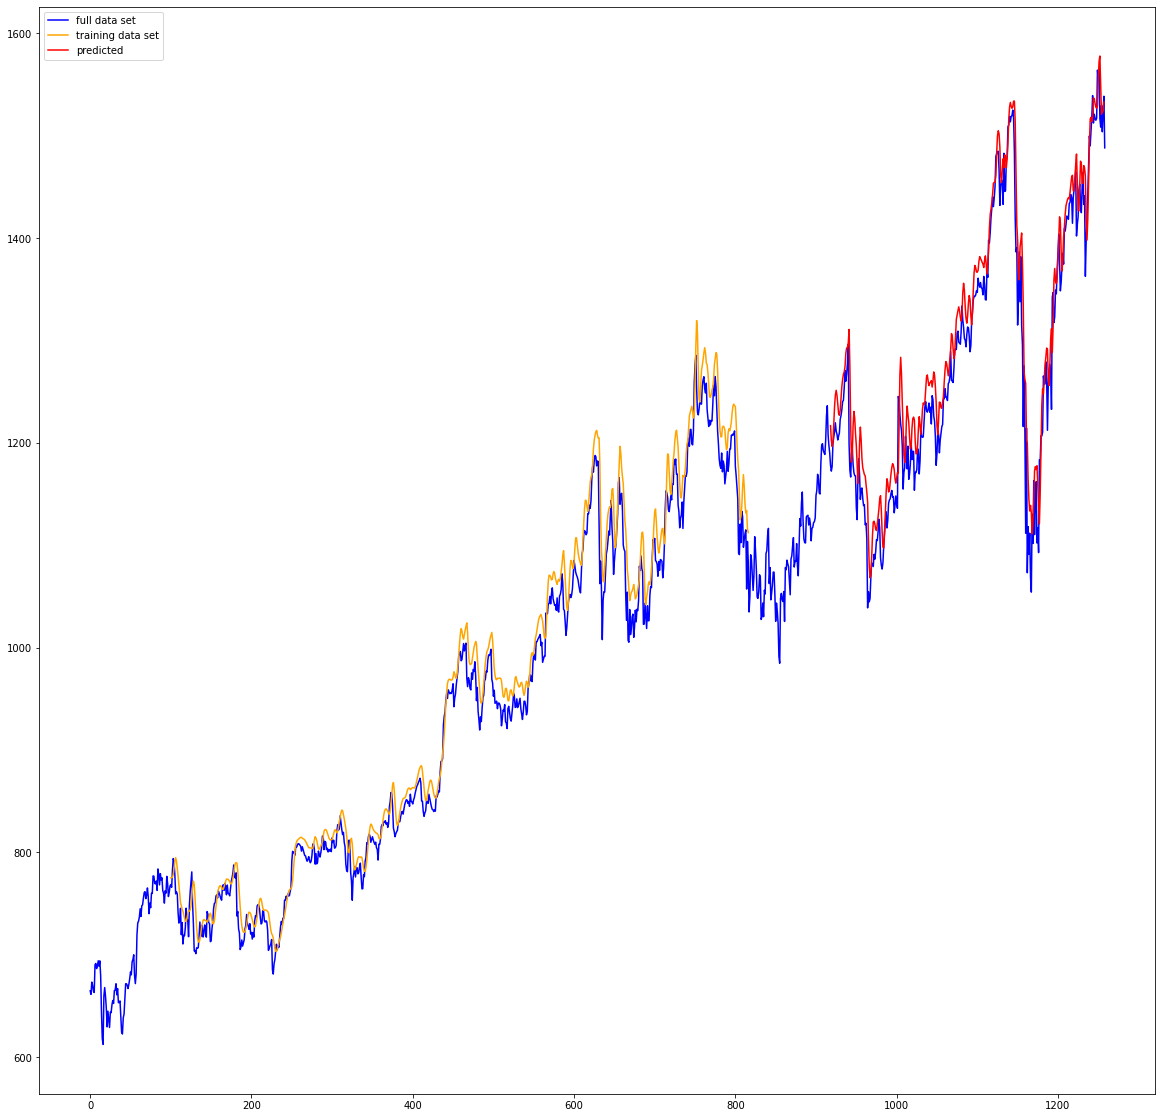

In [21]:
import matplotlib.pyplot as plt
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,20))
plt.plot(scaler.inverse_transform(df1),color='blue',label='full data set')
plt.plot(trainPredictPlot,color='orange',label='training data set')
plt.plot(testPredictPlot,color='red',label='predicted')
plt.legend(loc='upper left')
plt.show()

# Prediction of Future 

Prediction of future data from previous 100 days data

In [22]:
len(test_data)

441

## Reshapping my test data for hundred days

In [25]:

x_input=test_data[341:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

## Prediction of Next 10 Days

In [26]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9621544]
101
1 day input [0.52403452 0.63189063 0.48355698 0.53087003 0.5026565  0.52416052
 0.47852748 0.46374346 0.54341754 0.51360801 0.57797308 0.52268002
 0.56053256 0.57695458 0.51411201 0.52978853 0.504242   0.5992566
 0.5985951  0.62425712 0.62380562 0.62783763 0.68539869 0.67707218
 0.67720868 0.6998572  0.68111468 0.62967513 0.67823768 0.69163569
 0.6973372  0.69131019 0.65112665 0.76619627 0.77094227 0.74009324
 0.74595225 0.77337827 0.76960877 0.79465129 0.81046431 0.83067683
 0.8008463  0.77265377 0.78161028 0.7986203  0.81134631 0.8000273
 0.83652534 0.83399483 0.84080934 0.84934585 0.84820135 0.84605935
 0.86210336 0.86352086 0.87133287 0.86811987 0.84192234 0.86892837
 0.87734938 0.88159138 0.89484239 0.82890233 0.84047334 0.84868435
 0.87570088 0.88207438 0.86273336 0.85277935 0.88010038 0.89408639
 0.86124236 0.87006237 0.78757429 0.82393582 0.84585985 0.87100737
 0.9003339  0.93153993 0.92132342 0.93568744 0.95150045 0.97286797
 0.94474894 0.95381045 0.94963145 0.

In [28]:
len(df1)

1259

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

Plotting the graph of next 10 days prediction

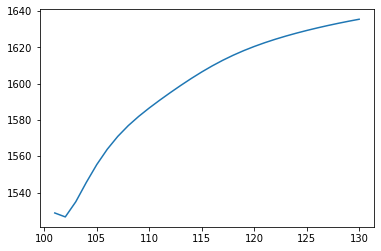

In [56]:
import matplotlib.pyplot as plt2
df3=df1.tolist()
df3.extend(lst_output)
plt2.plot(day_pred,scaler.inverse_transform(lst_output))


## Extending both predicted and 100 days test data

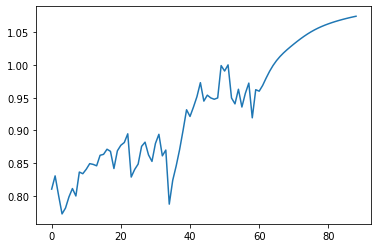

In [54]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

No handles with labels found to put in legend.


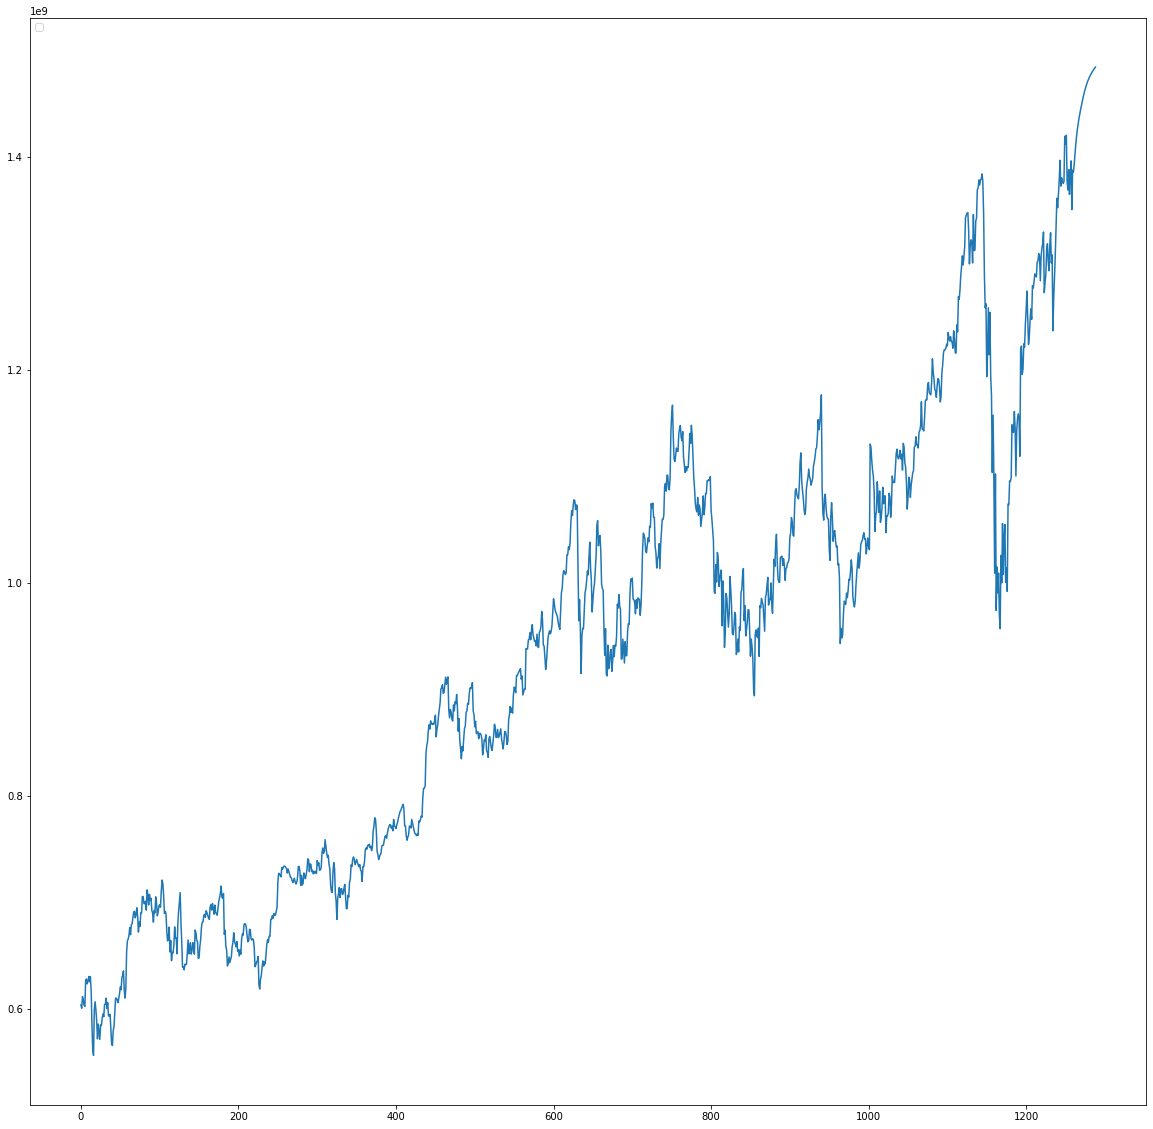

In [59]:
import matplotlib.pyplot as plt3
df3=scaler.inverse_transform(df3).tolist()
plt3.figure(figsize=(20,20))
plt3.legend(loc='upper left')
plt3.plot(df3,label='predicted')